In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

Epoch 1/50
25/25 - 1s - loss: 0.0941 - val_loss: 0.0659 - 1s/epoch - 47ms/step
Epoch 2/50
25/25 - 0s - loss: 0.0620 - val_loss: 0.0579 - 100ms/epoch - 4ms/step
Epoch 3/50
25/25 - 0s - loss: 0.0603 - val_loss: 0.0578 - 100ms/epoch - 4ms/step
Epoch 4/50
25/25 - 0s - loss: 0.0600 - val_loss: 0.0582 - 96ms/epoch - 4ms/step
Epoch 5/50
25/25 - 0s - loss: 0.0597 - val_loss: 0.0585 - 94ms/epoch - 4ms/step
Epoch 6/50
25/25 - 0s - loss: 0.0590 - val_loss: 0.0575 - 95ms/epoch - 4ms/step
Epoch 7/50
25/25 - 0s - loss: 0.0587 - val_loss: 0.0599 - 94ms/epoch - 4ms/step
Epoch 8/50
25/25 - 0s - loss: 0.0590 - val_loss: 0.0570 - 95ms/epoch - 4ms/step
Epoch 9/50
25/25 - 0s - loss: 0.0589 - val_loss: 0.0594 - 95ms/epoch - 4ms/step
Epoch 10/50
25/25 - 0s - loss: 0.0582 - val_loss: 0.0591 - 94ms/epoch - 4ms/step
Epoch 11/50
25/25 - 0s - loss: 0.0577 - val_loss: 0.0595 - 92ms/epoch - 4ms/step
Epoch 12/50
25/25 - 0s - loss: 0.0576 - val_loss: 0.0570 - 95ms/epoch - 4ms/step
Epoch 13/50
25/25 - 0s - loss: 0.057

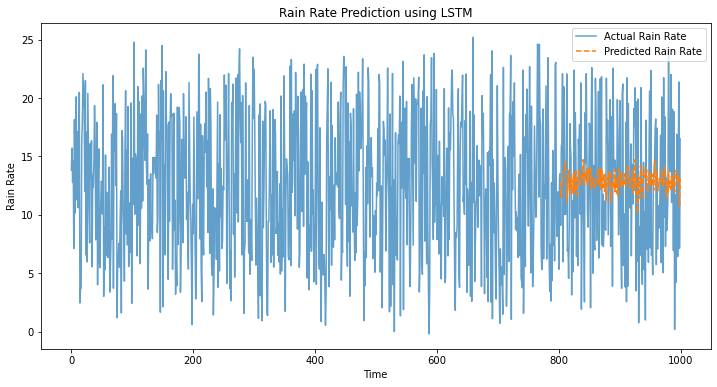

In [2]:
# Generate some example data
# Replace this with your actual time series data
np.random.seed(0)
n_samples = 1000
time = np.arange(0, n_samples)
relative_humidity = np.random.uniform(0, 100, n_samples)
atmospheric_water = np.random.uniform(0, 10, n_samples)
rain_rate = 0.2 * relative_humidity + 0.5 * atmospheric_water + np.random.normal(0, 1, n_samples)

# Create a DataFrame
data = pd.DataFrame({'time': time, 'relative_humidity': relative_humidity, 'atmospheric_water': atmospheric_water, 'rain_rate': rain_rate})

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data[['relative_humidity', 'atmospheric_water', 'rain_rate']])

# Create sequences for LSTM
sequence_length = 10
sequences = []
target = []
for i in range(len(scaled_data) - sequence_length):
    seq = scaled_data[i:i + sequence_length]
    label = scaled_data[i + sequence_length:i + sequence_length + 1, 2]  # Rain rate is the target variable
    sequences.append(seq)
    target.append(label)

sequences = np.array(sequences)
target = np.array(target)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(sequences, target, test_size=0.2, random_state=42)

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=2)

# Evaluate the model
train_loss = model.evaluate(X_train, y_train, verbose=0)
test_loss = model.evaluate(X_test, y_test, verbose=0)
print(f'Training Loss: {train_loss:.4f}')
print(f'Testing Loss: {test_loss:.4f}')

# Make predictions
predicted_rain_rate = model.predict(X_test)

# Inverse transform the predictions and actual values
predicted_rain_rate = scaler.inverse_transform(np.concatenate((X_test[:, -1, :2], predicted_rain_rate), axis=1))[:, 2]
actual_rain_rate = scaler.inverse_transform(np.concatenate((X_test[:, -1, :2], y_test.reshape(-1, 1)), axis=1))[:, 2]

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(data['time'], data['rain_rate'], label='Actual Rain Rate', alpha=0.7)
plt.plot(time[-len(predicted_rain_rate):], predicted_rain_rate, label='Predicted Rain Rate', linestyle='dashed')
plt.title('Rain Rate Prediction using LSTM')
plt.xlabel('Time')
plt.ylabel('Rain Rate')
plt.legend()
plt.show()
